<center><h1>Online Shoppers Intention Prediction</h1></center> 

### Data Source: 
http://archive.ics.uci.edu/ml/datasets/Online+Shoppers+Purchasing+Intention+Dataset
        
### Data Description: 
The dataset consists of feature vectors belonging to 12,330 sessions. The dataset was formed so that each session would belong to a different user in a 1-year period to avoid any tendency to a specific campaign, special day, user profile, or period. Of the 12,330 sessions in the dataset, 84.5% (10,422) were negative class samples that did not end with shopping, and the rest (1908) were positive class samples ending with shopping.

#### Numerical features
| Feature name | Feature description                                                 | Min. val | Max. val | SD     |
|:-------------|:--------------------------------------------------------------------|:---------|:---------|:-------|
| Admin.       | #pages visited by the visitor about account management              | 0        | 27       | 3.32   |
| Ad. duration | #seconds spent by the visitor on account management related pages	 | 0        | 3398     | 176.70 |
| Info.        | #informational pages visited by the visitor                         | 0        | 24       | 1.26   |
| Info. durat. | #seconds spent by the visitor on informational pages	             | 0        | 2549     | 140.64 |
| Prod.        | #pages visited by visitor about product related pages	             | 0        | 705      | 44.45  |
| Prod.durat.  | #seconds spent by the visitor on product related pages	             | 0        | 63,973   | 1912.3 |
| Bounce rate  | Average bounce rate value of the pages visited by the visitor	     | 0        | 0.2      | 0.04   |
| Exit rate	   | Average exit rate value of the pages visited by the visitor         | 0        | 0.2      | 0.05   |
| Page value   | Average page value of the pages visited by the visitor	             | 0        | 361      | 18.55  |
| Special day  | Closeness of the site visiting time to a special day	             | 0        | 1.0      | 0.19   |

#### Categorical features
| Feature name        | Feature description                                                      | Number of Values |
|:--------------------|:-------------------------------------------------------------------------|:-----------------|
| OperatingSystems    | Operating system of the visitor                                          | 8                |
| Browser             | Browser of the visitor                                                   | 13               |
| Region              | Geographic region from which the session has been started by the visitor | 9                |
| TrafficType         | Traffic source (e.g., banner, SMS, direct)                               | 20               |
| VisitorType         | Visitor type as “New Visitor,” “Returning Visitor,” and “Other”	         | 3                |
| Weekend             | Boolean value indicating whether the date of the visit is weekend        | 2                |
| Month               | Month value of the visit date                                            | 12               |
| Revenue             | Class label: whether the visit has been finalized with a transaction     | 2                |

### Project Goal
The main goal of this project is to design a machine learning classification system, that is able to predict an online shopper's intention ( _buy_ or _no_ _buy_ ), based on the values of the given features. 

We will try a number of different classification algorithms, and compare their performance, in order to pick the best one for the project.

### Libraries Import

In [1]:
import numpy as np
import pandas as pd 

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import classification_report

from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

### Data Import

In [ ]:
df = pd.read_csv("./data/online_shoppers_intention.csv")

### Data Description

#### Data Header

In [3]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


#### Data Types

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

Here we can see that most of our dataset is numerical, either integers or floats; *Revenue* and *Weekend* are boolean type, and they can easly be transformed into binary type (0 & 1). 

#### Statistical Analysis of Our Dataset

In [5]:
df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


### Data Cleaning

#### Missing Data Points

In [6]:
print(df.isnull().sum())

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64


It looks like our dataset has no missing values at all, which is great.

#### Data Type Fix

We will transform *Revenue* & *Weekend* features from *boolean* into *binary*, so that we can easily use them in our later calculations. 

In [7]:
df.Revenue = df.Revenue.astype('int64')
df.Weekend = df.Weekend.astype('int64')

Now, let's check dataset info: 

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

Both *Revenue* and *Weekend* has been transformed into binary (0's and 1's). 

### EDA

#### Correlation Analysis

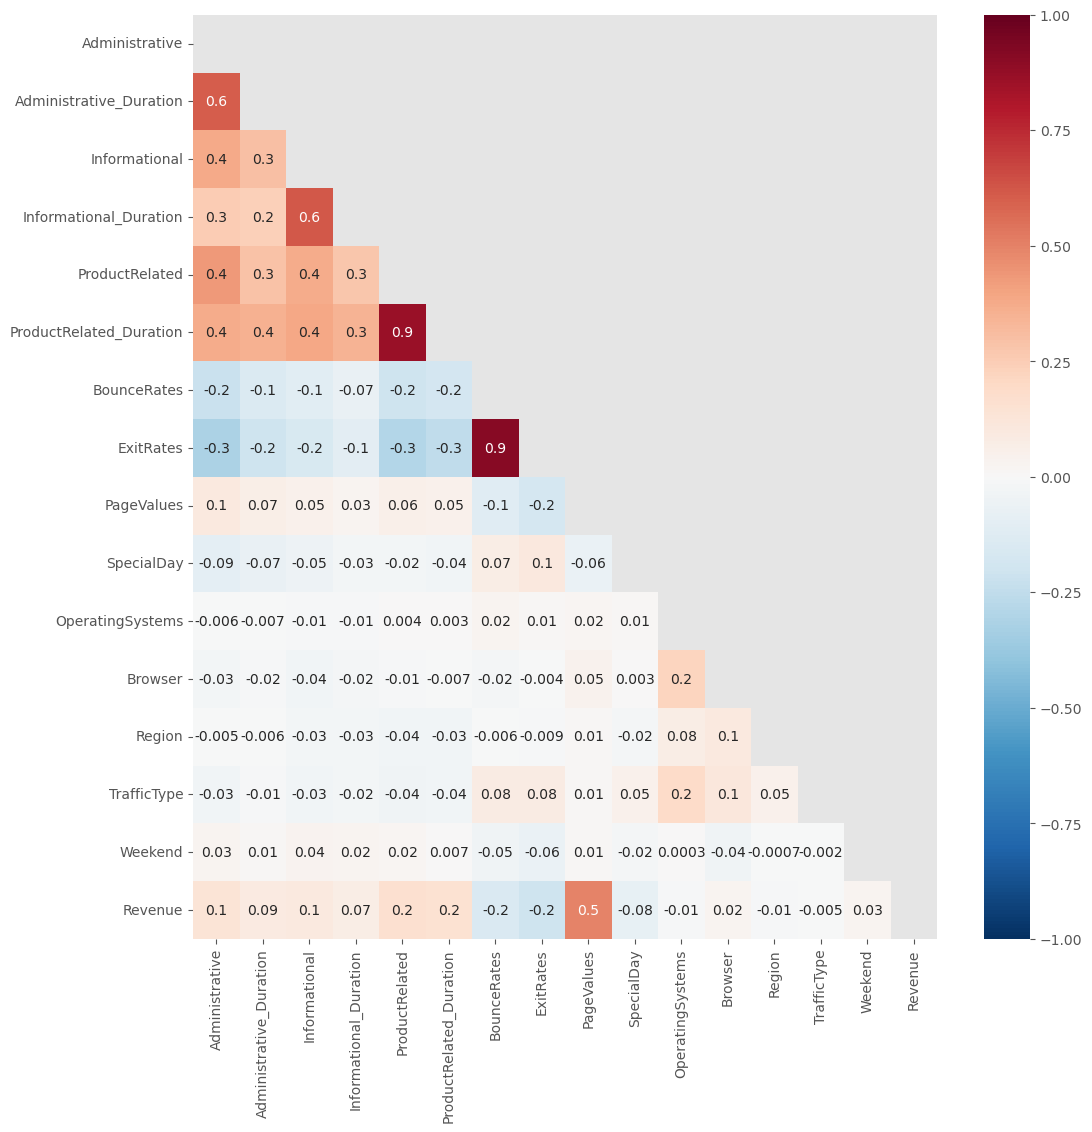

In [9]:
matrix = np.triu(df.corr())
fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(df.corr(), annot=True, ax=ax, fmt='.1g', vmin=-1, vmax=1, center= 0, mask=matrix, cmap='RdBu_r')
plt.show()

From the above heatmap, we observe the following: 
- In general, there is very little correlation among the different features in our dataset. 
- The very few cases of high correlation (|corr| >= 0.7) are: 
    - BounceRates & ExitRates (0.9). 
    - ProductRelated & ProductRelated_Duration (0.9).
- Moderate Correlations (0.3 < |corr| < 0.7): 
    - Among the following features: Administrative, Administrative_Duration, Informational, Informational_Duration, ProductRelated, and ProductRelated_Duration. 
    - Also between PageValues and Revenue. 

let's now show correlation among a few of our features

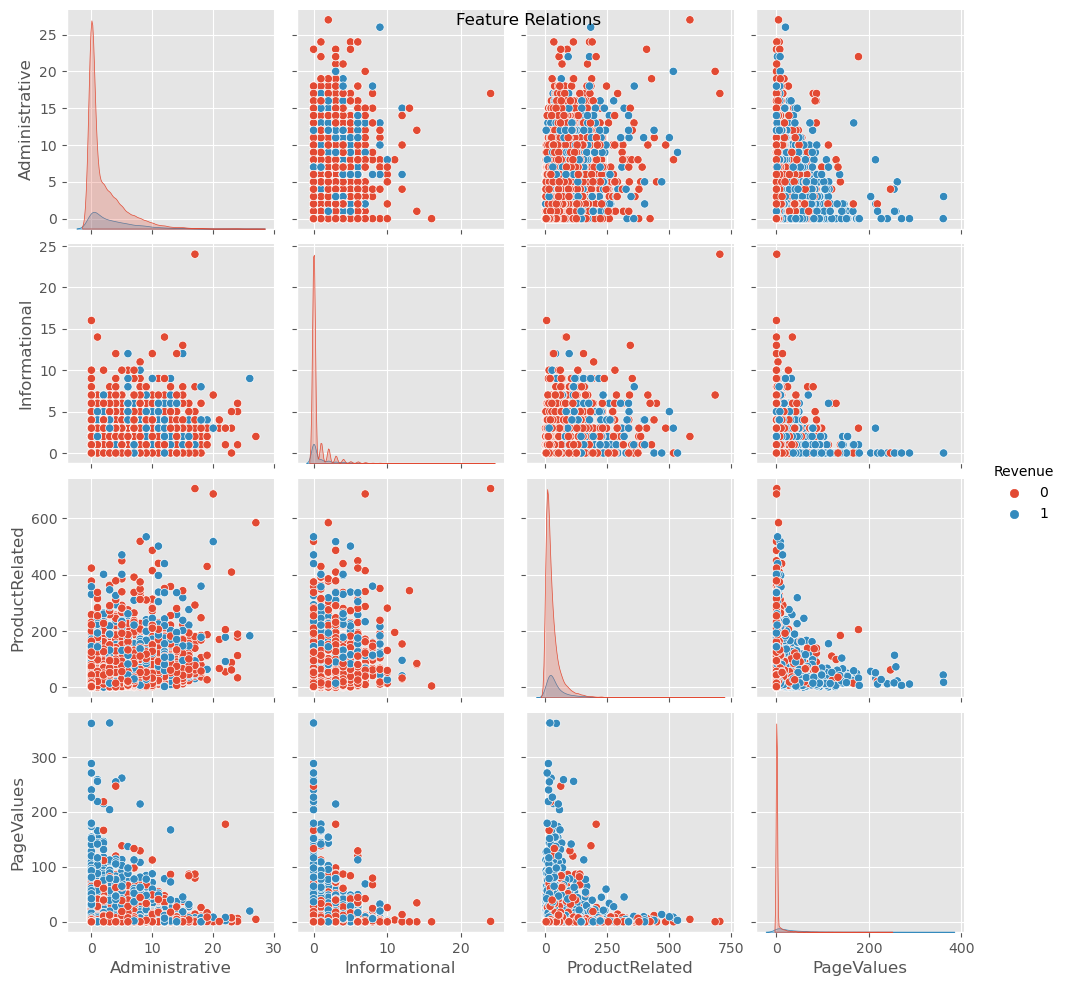

In [10]:
g1 = sns.pairplot(df[['Administrative', 'Informational', 'ProductRelated', 'PageValues', 'Revenue']], hue='Revenue')
g1.fig.suptitle('Feature Relations')
plt.show()

From the above figure, we can see: 
- No strong correlation between *Revenue* (our target) and any other feature. 
- A strong negative correlation between *PageValues* and other features shown. 

#### Web Pages Analysis

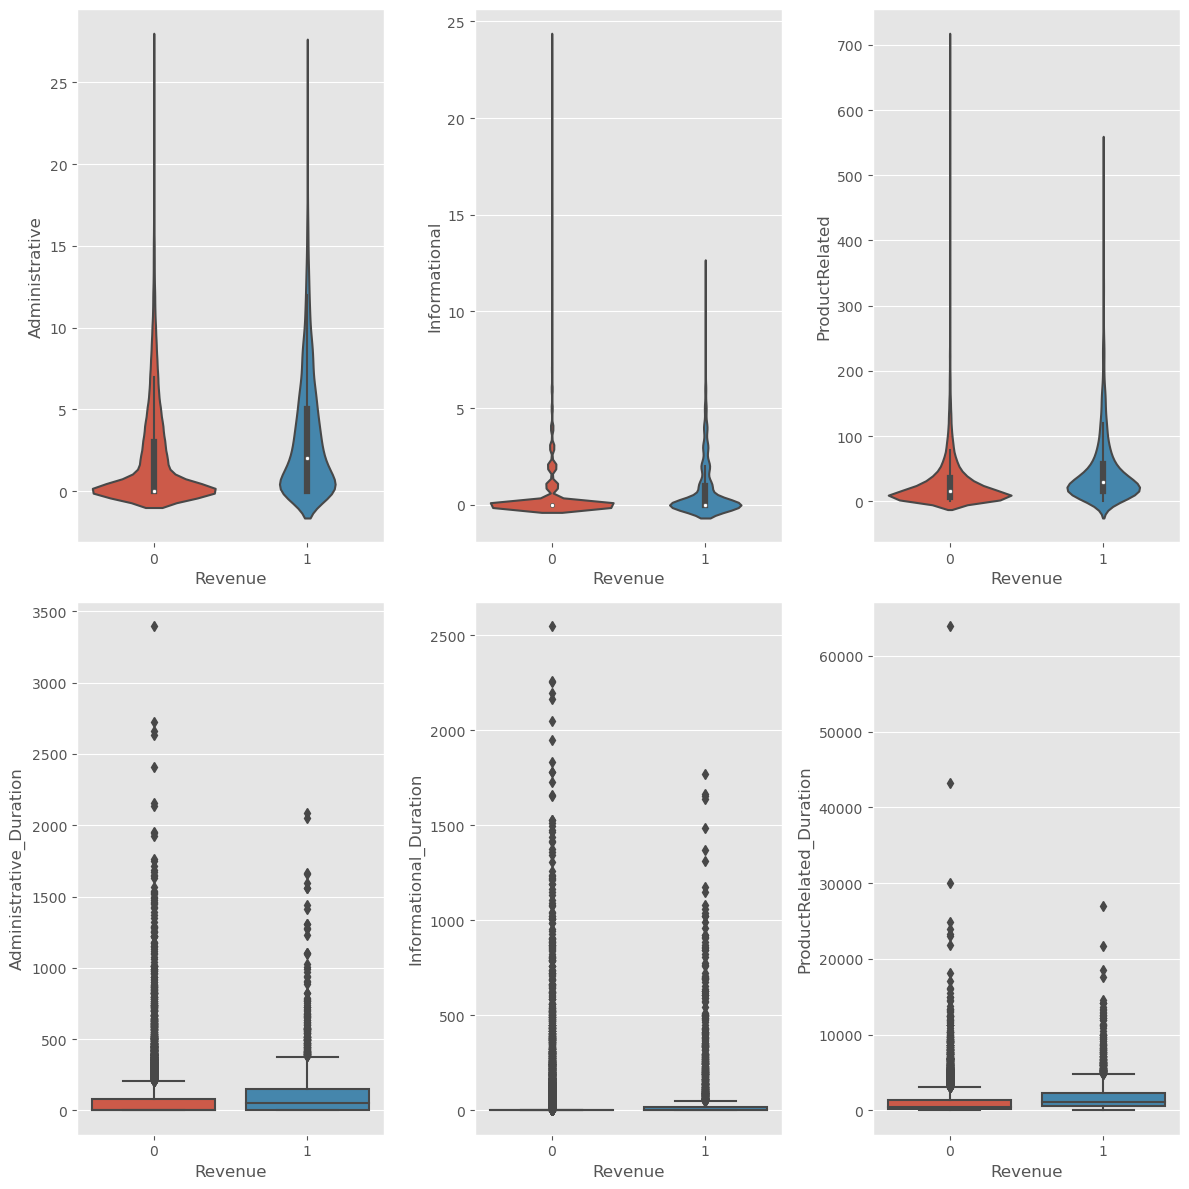

In [11]:
fig = plt.figure(figsize=(12, 12))

ax1 = fig.add_subplot(2, 3, 1)
ax2 = fig.add_subplot(2, 3, 2)
ax3 = fig.add_subplot(2, 3, 3)
ax4 = fig.add_subplot(2, 3, 4)
ax5 = fig.add_subplot(2, 3, 5)
ax6 = fig.add_subplot(2, 3, 6)

sns.violinplot(data=df, x = 'Revenue', y = 'Administrative', ax=ax1)
sns.violinplot(data=df, x = 'Revenue', y = 'Informational', ax=ax2)
sns.violinplot(data=df, x = 'Revenue', y = 'ProductRelated', ax=ax3)
sns.boxplot(data=df, x = 'Revenue', y = 'Administrative_Duration', ax=ax4)
sns.boxplot(data=df, x = 'Revenue', y = 'Informational_Duration', ax=ax5)
sns.boxplot(data=df, x = 'Revenue', y = 'ProductRelated_Duration', ax=ax6)

plt.tight_layout()
plt.show()

From the above boxplots, we can see that:
- In general, visitors tend to visit less pages, and spend less time, if they are not going to make a purchase. 
- The number of product related pages, and the time spent on them, is way higher than that for account related or informational pages.
- The first 3 feature look like they follow a skewed normal distribution. 

#### Page Metrics Analysis

c:\Users\xxy\.conda\envs\paddle3.7\lib\site-packages\ipykernel_launcher.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  import sys
c:\Users\xxy\.conda\envs\paddle3.7\lib\site-packages\ipykernel_launcher.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  
c:\Users\xxy\.conda\envs\paddle3.7\lib\site-packages\ipykernel

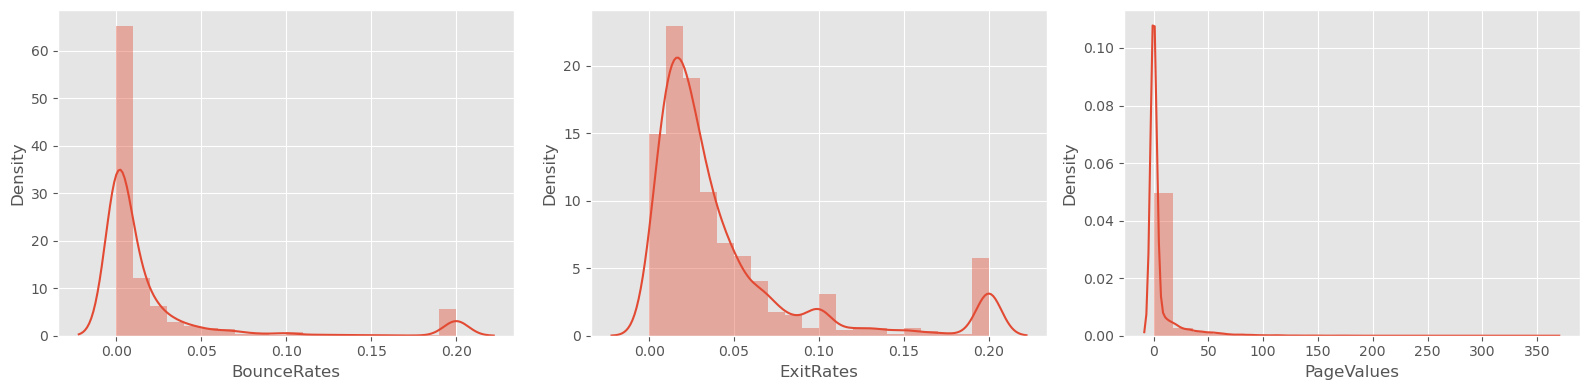

In [12]:
fig = plt.figure(figsize=(16, 4))

ax1 = fig.add_subplot(1, 3, 1)
ax2 = fig.add_subplot(1, 3, 2)
ax3 = fig.add_subplot(1, 3, 3)

sns.distplot(df['BounceRates'], bins=20, ax=ax1)
sns.distplot(df['ExitRates'], bins=20, ax=ax2)
sns.distplot(df['PageValues'], bins=20, ax=ax3)

plt.tight_layout()
plt.show()

From the above visualizations of 3 google analytics metrics, we can conclude: 
- *BounceRates* & *PageValues* do not follow a normal distribution. 
- All 3 features have distributions that are skewed right. 
- All 3 distributions have a lot of outliers. 
- The average bounce and exit rates of most of our data points is low, which is good, since high rates identicate that visitors are not engaging with the website. 
- Exit rate has more high values than bounce rate, which makes sense, where transaction confirmation pages for example will cause the average exit rate to increase. 
- Bounce rate ==> the percentage where the first page visited was the only page visited in that session. 
- Exit rate of a page ==> The percentage where that page was the last page visited in the session, out of all visits to that page. 

#### Visitor Analysis

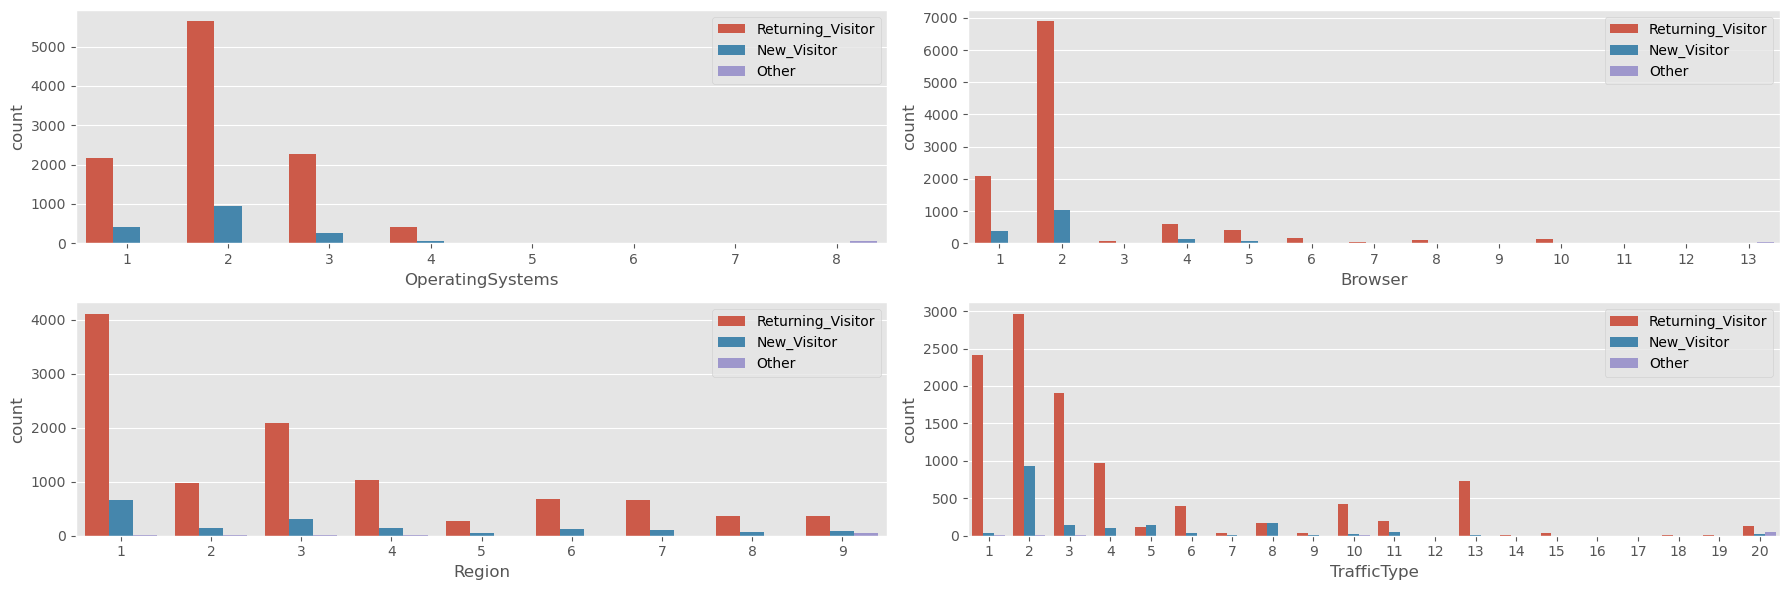

In [13]:
fig = plt.figure(figsize=(18, 6))

ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4)

sns.countplot(data=df, x='OperatingSystems', hue='VisitorType', ax=ax1)
sns.countplot(data=df, x='Browser', hue='VisitorType', ax=ax2)
sns.countplot(data=df, x='Region', hue='VisitorType', ax=ax3)
sns.countplot(data=df, x='TrafficType', hue='VisitorType', ax=ax4)

ax1.legend(loc='upper right')
ax2.legend(loc='upper right')
ax3.legend(loc='upper right')
ax4.legend(loc='upper right')
plt.tight_layout()
plt.show()

- 1 Operating system is responsible for ~7000 of the examples in our dataset. 
- 4 of the 8 operating systems used, are responsible of a very small number (<200) of the examples in our dataset. 
- A similar story repeated with the browsers used by visitors, where there is 1 dominant browser, 3 with decent representation in the dataset, and the rest are rarey used. 
- It looks like we have a very regionally diverse traffic in our dataset. 
- Also Traffic sources are very diverse, with a few that did not contribute much to the dataset. 

#### Visit Date Analysis

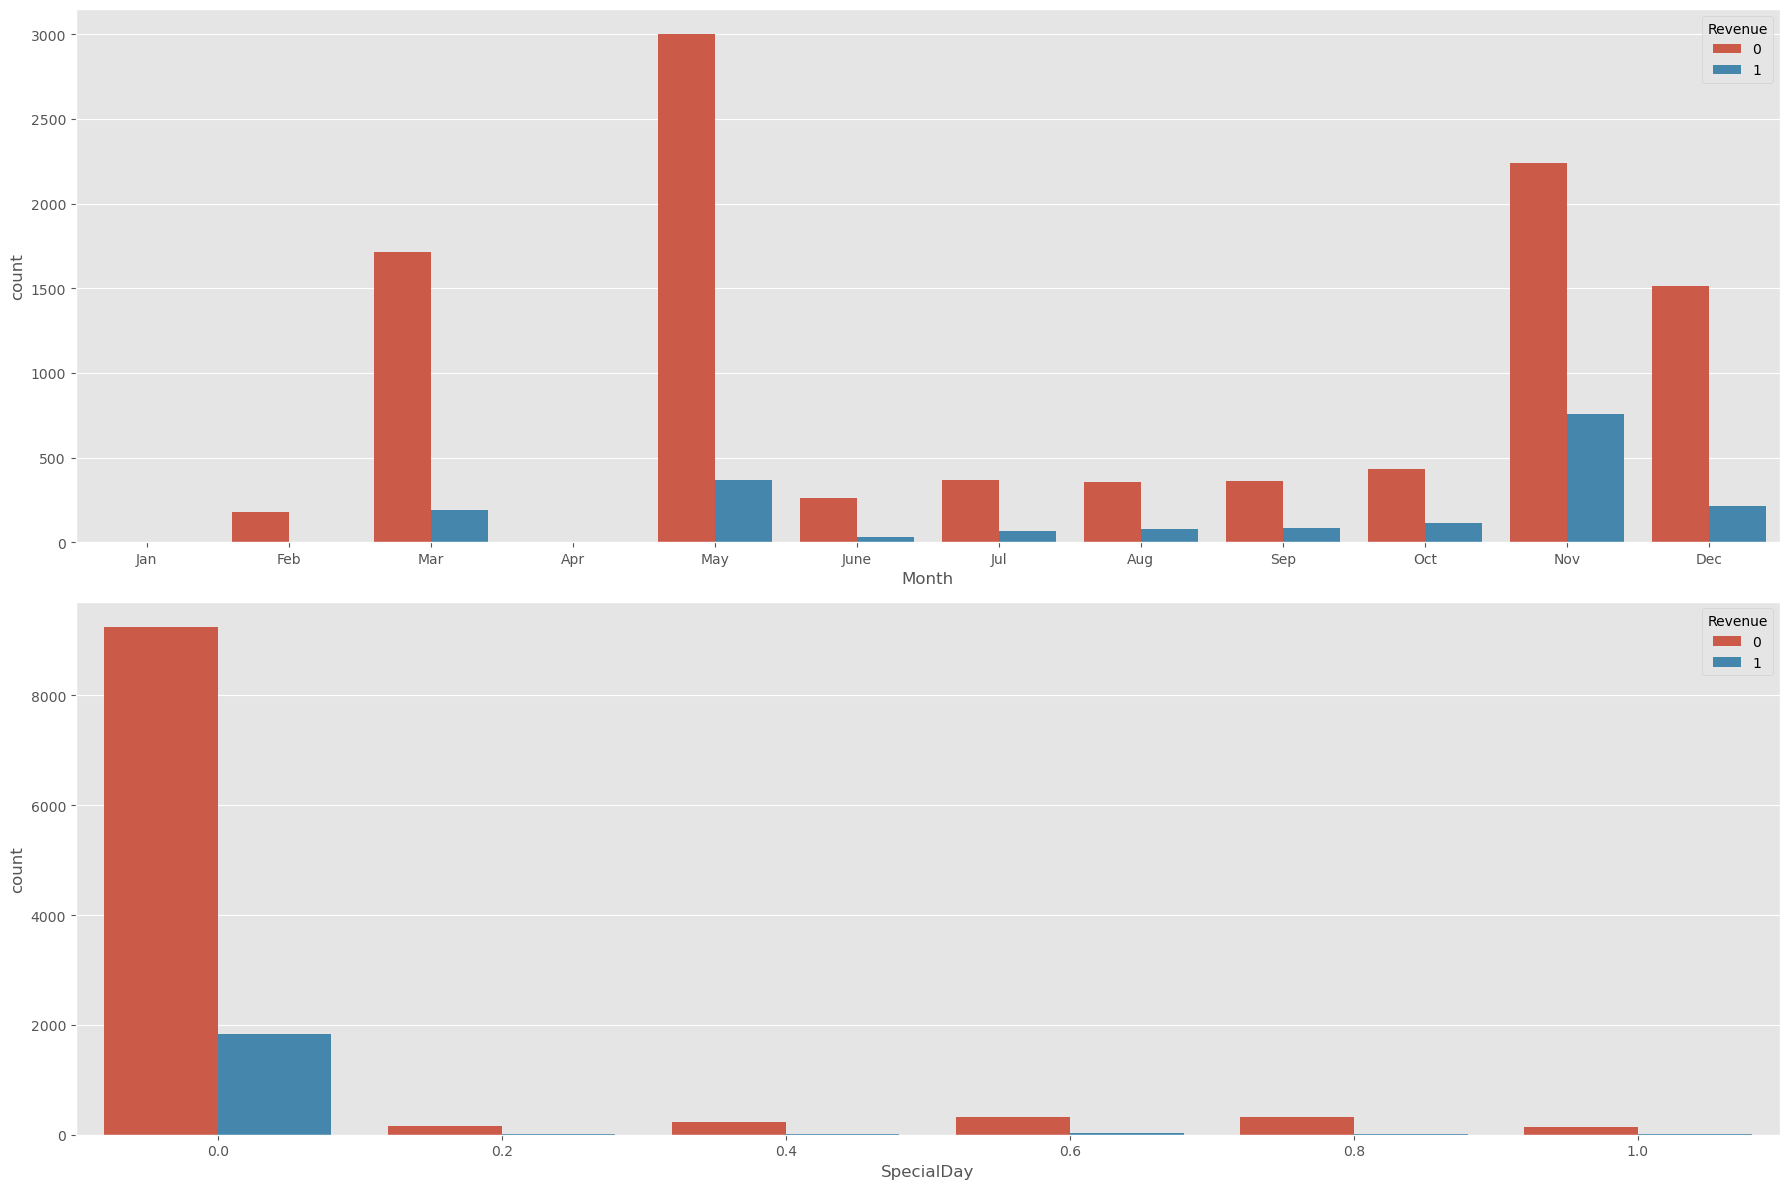

In [14]:
fig = plt.figure(figsize=(18, 12))

ax1 = fig.add_subplot(2, 1, 1)
ax2 = fig.add_subplot(2, 1, 2)

orderlist = ['Jan','Feb','Mar','Apr','May','June','Jul','Aug','Sep','Oct','Nov','Dec']
sns.countplot(data=df, x='Month', hue='Revenue', ax=ax1, order=orderlist)
sns.countplot(data=df, x='SpecialDay', hue='Revenue', ax=ax2)

plt.tight_layout()
plt.show()

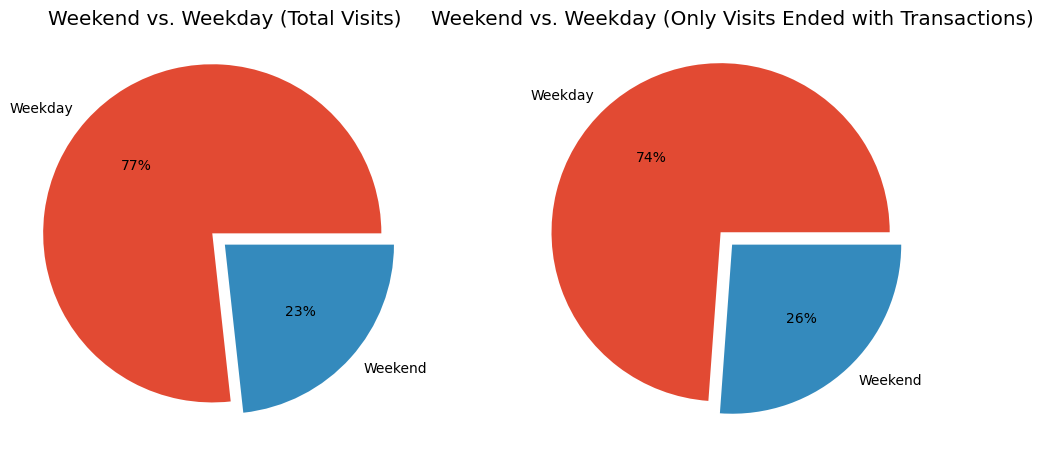

In [15]:
fig, ax = plt.subplots(1, 2,figsize=(12, 6), subplot_kw=dict(aspect="equal"))
ax[0].pie(df['Weekend'].value_counts(),explode=(0.1,0),labels=['Weekday','Weekend'], autopct='%1.0f%%')
ax[0].set_title('Weekend vs. Weekday (Total Visits)')
ax[1].pie(df[df['Revenue'] == 1]['Weekend'].value_counts(),explode=(0.1,0),labels=['Weekday','Weekend'], autopct='%1.0f%%')
ax[1].set_title('Weekend vs. Weekday (Only Visits Ended with Transactions)')
#fig.suptitle('Weekend Visits')
plt.show()

- On March and May, we have a lot of visits (May is the month with the highest number of visits), yet transactions made during those 2 months are not on the same level. 
- We have no visits at all during Jan nor Apr.
- Most transactions happen during the end of the year, with Nov as the month with the highest number of confirmed transactions. 
- The closer the visit date to a special day (like black Friday, new year's, ... etc) the more likely it will end up in a transaction. 
- Most of transactions happen on special days (SpecialDay =0). 
- It does not look like weekends affect the number of visits or transactions much, we can see only a slight increase in the number of transactions happening on weekends compared to those on weekdays. 

### Data Pre-Processing

In this section we will make our data ready for model training. This will include:

- Transform *Month* and *VisitorType* columns into numerical (binary) values.
- Split data set into training, validation, and testing parts (70/15/15), while separating *Revenue* column, where it will be used as our labels.
- We will ably feature scaling on our input data, in order to be used for Naive Bayes and SVM model training.

#### Data Transformation

In [16]:
dff = pd.concat([df,pd.get_dummies(df['Month'], prefix='Month')], axis=1).drop(['Month'],axis=1)
dff = pd.concat([dff,pd.get_dummies(dff['VisitorType'], prefix='VisitorType')], axis=1).drop(['VisitorType'],axis=1)
print(dff.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 29 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Administrative                 12330 non-null  int64  
 1   Administrative_Duration        12330 non-null  float64
 2   Informational                  12330 non-null  int64  
 3   Informational_Duration         12330 non-null  float64
 4   ProductRelated                 12330 non-null  int64  
 5   ProductRelated_Duration        12330 non-null  float64
 6   BounceRates                    12330 non-null  float64
 7   ExitRates                      12330 non-null  float64
 8   PageValues                     12330 non-null  float64
 9   SpecialDay                     12330 non-null  float64
 10  OperatingSystems               12330 non-null  int64  
 11  Browser                        12330 non-null  int64  
 12  Region                         12330 non-null 

In [17]:
dff.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1


#### Data Split

In [18]:
y = dff['Revenue']
X = dff.drop(['Revenue'], axis=1)

In [19]:
X_train, X_valtest, y_train, y_valtest = train_test_split(X, y, test_size=0.3, random_state=101)
X_val, X_test, y_val, y_test = train_test_split(X_valtest, y_valtest, test_size=0.5, random_state=101)

Now we have the following data subsets:
1. Train data (X_train) and trin labels (y_train) ==> 70%
2. Validation data (X_val) and validation labels (y_val) ==> 15%
3. Test data (X_test) and test labels (y)test) ==> 15%

#### Data Scaling

We will scale the features in our subsets, in order to use them to train, validate, and test models that will benefit from feature scaling.  

In [20]:
sc_X = StandardScaler()

Xsc_train = sc_X.fit_transform(X_train)
Xsc_val = sc_X.fit_transform(X_val)
Xsc_test = sc_X.fit_transform(X_test)

## Model Building

### Naive Bayes

We will go with a Gaussian Naive Bayes classifier, since some of our features are normally distributed, even though other features don't follow a normal distribution. 

In [21]:
nbm = GaussianNB()
nbm.fit(X_train,y_train)
nbm_pred = nbm.predict(X_val)

print('Gaussian Naive Bayes Performance:')
print('---------------------------------')
print('Accuracy        : ', metrics.accuracy_score(y_val, nbm_pred))
print('F1 Score        : ', metrics.f1_score(y_val, nbm_pred))
print('Precision       : ', metrics.precision_score(y_val, nbm_pred))
print('Recall          : ', metrics.recall_score(y_val, nbm_pred))
print('Confusion Matrix:\n ', confusion_matrix(y_val, nbm_pred))

Gaussian Naive Bayes Performance:
---------------------------------
Accuracy        :  0.775013520822066
F1 Score        :  0.4914425427872861
Precision       :  0.3941176470588235
Recall          :  0.6525974025974026
Confusion Matrix:
  [[1232  309]
 [ 107  201]]


Naive Bayes result is less thsn desirable, one reason might be the Gaussian distribution assumption, which for sure does not fit all of the features in our dataset. 

### KNN

For K-Nearest Neighbor classifier, we will be using the scaled version of our dataset. 

KNN is a non-parametric (no assumption for underlying data distribution) learning algorithm, the model structure determined from the dataset. This will be very helpful in dataset where many features do not follow a specific theoretical assumption.

In [22]:
knn = KNeighborsClassifier(n_neighbors=5,weights='uniform',leaf_size=30,p=2) #default values
knn.fit(Xsc_train,y_train)
knn_pred = knn.predict(Xsc_val)

print('K-Nearest Neighbor Initial Performance:')
print('---------------------------------------')
print('Accuracy        : ', metrics.accuracy_score(y_val, knn_pred))
print('F1 Score        : ', metrics.f1_score(y_val, knn_pred))
print('Precision       : ', metrics.precision_score(y_val, knn_pred))
print('Recall          : ', metrics.recall_score(y_val, knn_pred))
print('Confusion Matrix:\n ', confusion_matrix(y_val, knn_pred))

K-Nearest Neighbor Initial Performance:
---------------------------------------
Accuracy        :  0.8734451054624122
F1 Score        :  0.5021276595744681
Precision       :  0.7283950617283951
Recall          :  0.38311688311688313
Confusion Matrix:
  [[1497   44]
 [ 190  118]]


Compared to Naive Bayes, KNN's initial model causes a considerable increase in accuracy and F1 score, with a decrease in recall. Now we will try increase its performance even more with hyper-parameter tuning via grid search.  

##### KNN Tuning

The following KNN parameters will be tuned: 
- leaf_size: Leaf size can affect the speed and the memory required to store the tree.
- n_neighbors: Number of neighbors to use
- p: determines the distance metric to be used: p=1 ==> manhattan_distance, and p=2 ==> euclidean_distance
- weights: weight function used in prediction

In [23]:
knn_param_grid = {'n_neighbors': list(range(1,30)), 
                  'leaf_size': [1,10,20,30,40,50], 
                  'p': [1,2],
                  'weights': ['uniform','distance']}
knn_grid = GridSearchCV(KNeighborsClassifier(),
                        knn_param_grid,
                        verbose=3)

In [24]:
knn_grid.fit(Xsc_train,y_train)

Fitting 5 folds for each of 696 candidates, totalling 3480 fits
[CV 1/5] END leaf_size=1, n_neighbors=1, p=1, weights=uniform;, score=0.828 total time=   0.2s
[CV 2/5] END leaf_size=1, n_neighbors=1, p=1, weights=uniform;, score=0.845 total time=   0.2s
[CV 3/5] END leaf_size=1, n_neighbors=1, p=1, weights=uniform;, score=0.849 total time=   0.2s
[CV 4/5] END leaf_size=1, n_neighbors=1, p=1, weights=uniform;, score=0.849 total time=   0.2s
[CV 5/5] END leaf_size=1, n_neighbors=1, p=1, weights=uniform;, score=0.848 total time=   0.2s
[CV 1/5] END leaf_size=1, n_neighbors=1, p=1, weights=distance;, score=0.828 total time=   0.2s
[CV 2/5] END leaf_size=1, n_neighbors=1, p=1, weights=distance;, score=0.845 total time=   0.1s
[CV 3/5] END leaf_size=1, n_neighbors=1, p=1, weights=distance;, score=0.849 total time=   0.1s
[CV 4/5] END leaf_size=1, n_neighbors=1, p=1, weights=distance;, score=0.849 total time=   0.1s
[CV 5/5] END leaf_size=1, n_neighbors=1, p=1, weights=distance;, score=0.848 

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'leaf_size': [1, 10, 20, 30, 40, 50],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29],
                         'p': [1, 2], 'weights': ['uniform', 'distance']},
             verbose=3)

In [25]:
knn_grid.best_params_

{'leaf_size': 1, 'n_neighbors': 8, 'p': 1, 'weights': 'distance'}

In [26]:
knn_grid.best_estimator_

KNeighborsClassifier(leaf_size=1, n_neighbors=8, p=1, weights='distance')

In [27]:
knn_grid_pred = knn_grid.predict(Xsc_val)

In [28]:
print('K-Nearest Neighbor Tuned Performance:')
print('-------------------------------------')
print('Accuracy        : ', metrics.accuracy_score(y_val, knn_grid_pred))
print('F1 Score        : ', metrics.f1_score(y_val, knn_grid_pred))
print('Precision       : ', metrics.precision_score(y_val, knn_grid_pred))
print('Recall          : ', metrics.recall_score(y_val, knn_grid_pred))
print('Confusion Matrix:\n ', confusion_matrix(y_val, knn_grid_pred))

K-Nearest Neighbor Tuned Performance:
-------------------------------------
Accuracy        :  0.8674959437533802
F1 Score        :  0.44191343963553537
Precision       :  0.7404580152671756
Recall          :  0.31493506493506496
Confusion Matrix:
  [[1507   34]
 [ 211   97]]


We can see that a very slight change occured to KNN's performance after hyper-parameters tuning. 

### SVM

For SVM classifier, we will be using the scaled version of our dataset.

SVM offers high accuracy classification, and it is known for its kernel trick to handle nonlinear input spaces. The classifier separates data points using a hyperplane with the largest amount of margin. SVM finds an optimal hyperplane which helps in classifying new data points.

In [29]:
svm = SVC(C=1.0,kernel='rbf',degree=3,gamma='auto') #default values
svm.fit(Xsc_train,y_train)
svm_pred = svm.predict(Xsc_val)

print('SVM Initial Performance:')
print('------------------------')
print('Accuracy        : ', metrics.accuracy_score(y_val, svm_pred))
print('F1 Score        : ', metrics.f1_score(y_val, svm_pred))
print('Precision       : ', metrics.precision_score(y_val, svm_pred))
print('Recall          : ', metrics.recall_score(y_val, svm_pred))
print('Confusion Matrix:\n ', confusion_matrix(y_val, svm_pred))

SVM Initial Performance:
------------------------
Accuracy        :  0.8875067604110329
F1 Score        :  0.5856573705179283
Precision       :  0.7577319587628866
Recall          :  0.4772727272727273
Confusion Matrix:
  [[1494   47]
 [ 161  147]]


Compared to KNN, SVM's initial model resulted in a considerable increase in all performance metrics. Now we will try increase its performance even more with hyper-parameter tuning via grid search.

##### SVM Tuning

The following parameters will be tuned: 
- Kernel: Transforms the given dataset into the required form. There are various types of functions such as linear, polynomial, and radial basis function (RBF). Polynomial and RBF are useful for non-linear hyperplane. This transformation can lead to more accurate classifiers.
- Regularization: C parameter used to maintain regularization. A smaller value of C creates a small-margin hyperplane and a larger value of C creates a larger-margin hyperplane.
- Gamma: A lower value of Gamma will loosely fit the training dataset, whereas a higher value of gamma will exactly fit the training dataset, which causes over-fitting. A low value of gamma considers only nearby points in calculating the separation line, while a large value of gamma considers all the data points in the calculation of the separation line.

In [30]:
svm_param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [0.1,0.01,0.001,0.0001], 
              'kernel': ['linear', 'poly', 'rbf', 'sigmoid']} 
svm_grid = GridSearchCV(SVC(),
                        svm_param_grid,
                        refit=True,
                        verbose=3)

In [31]:
svm_grid.fit(Xsc_train,y_train)

Fitting 5 folds for each of 80 candidates, totalling 400 fits
[CV 1/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.880 total time=   2.0s
[CV 2/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.887 total time=   2.0s
[CV 3/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.885 total time=   1.9s
[CV 4/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.887 total time=   2.2s
[CV 5/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.885 total time=   2.1s
[CV 1/5] END .....C=0.1, gamma=0.1, kernel=poly;, score=0.880 total time=   2.3s
[CV 2/5] END .....C=0.1, gamma=0.1, kernel=poly;, score=0.881 total time=   2.8s
[CV 3/5] END .....C=0.1, gamma=0.1, kernel=poly;, score=0.884 total time=   2.0s
[CV 4/5] END .....C=0.1, gamma=0.1, kernel=poly;, score=0.890 total time=   2.1s
[CV 5/5] END .....C=0.1, gamma=0.1, kernel=poly;, score=0.882 total time=   2.2s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.860 total time=   3.2s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             verbose=3)

In [32]:
svm_grid.best_params_

{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}

In [33]:
svm_grid.best_estimator_

SVC(C=10, gamma=0.01)

In [34]:
svm_grid = SVC(C=10,kernel='rbf',degree=3,gamma=0.01) #default values
svm_grid.fit(Xsc_train,y_train)

svm_grid_pred = svm_grid.predict(Xsc_val)

print('SVM Tuned Performance:')
print('----------------------')
print('Accuracy        : ', metrics.accuracy_score(y_val, svm_grid_pred))
print('F1 Score        : ', metrics.f1_score(y_val, svm_grid_pred))
print('Precision       : ', metrics.precision_score(y_val, svm_grid_pred))
print('Recall          : ', metrics.recall_score(y_val, svm_grid_pred))
print('Confusion Matrix:\n ', confusion_matrix(y_val, svm_grid_pred))

SVM Tuned Performance:
----------------------
Accuracy        :  0.8891292590589508
F1 Score        :  0.6003898635477583
Precision       :  0.751219512195122
Recall          :  0.5
Confusion Matrix:
  [[1490   51]
 [ 154  154]]


We can see a decent increase in classification accuracy and F1_Score due to tuning SVM's hyperparameters. 

### Logistic Regression

Logistic regression measures the relationship between the categorical dependent variable and the independent variables by estimating probabilities using a logistic/sigmoid function. 

In [35]:
lrm = LogisticRegression(C=1.0,solver='lbfgs',) #default parameters
lrm.fit(X_train,y_train)
lrm_pred = lrm.predict(X_val)

print('Logistic Regression initial Performance:')
print('----------------------------------------')
print('Accuracy        : ', metrics.accuracy_score(y_val, lrm_pred))
print('F1 Score        : ', metrics.f1_score(y_val, lrm_pred))
print('Precision       : ', metrics.precision_score(y_val, lrm_pred))
print('Recall          : ', metrics.recall_score(y_val, lrm_pred))
print('Confusion Matrix:\n ', confusion_matrix(y_val, lrm_pred))

Logistic Regression initial Performance:
----------------------------------------
Accuracy        :  0.8788534342888048
F1 Score        :  0.5313807531380752
Precision       :  0.7470588235294118
Recall          :  0.41233766233766234
Confusion Matrix:
  [[1498   43]
 [ 181  127]]


c:\Users\xxy\.conda\envs\paddle3.7\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


The default logistic regression classifier resulted in less accuracy and F1 score compared to SVM. Next we will try to tune it hyper-parameters to achieve better performance. 

##### Logistic Regression Tuning

In [36]:
lrm_param_grid = {'C': [0.01, 0.1, 1, 10, 100],  
              'solver': ['newton-cg', 'lbfgs', 'sag', 'saga']} 
lrm_grid = GridSearchCV(LogisticRegression(),
                        lrm_param_grid,
                        refit=True,
                        verbose=3)

In [37]:
lrm_grid.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV 1/5] END ..........C=0.01, solver=newton-cg;, score=0.877 total time=   0.5s
[CV 2/5] END ..........C=0.01, solver=newton-cg;, score=0.882 total time=   0.6s
[CV 3/5] END ..........C=0.01, solver=newton-cg;, score=0.884 total time=   0.4s
[CV 4/5] END ..........C=0.01, solver=newton-cg;, score=0.881 total time=   0.5s
[CV 5/5] END ..........C=0.01, solver=newton-cg;, score=0.877 total time=   0.6s


c:\Users\xxy\.conda\envs\paddle3.7\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
c:\Users\xxy\.conda\envs\paddle3.7\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mod

[CV 1/5] END ..............C=0.01, solver=lbfgs;, score=0.880 total time=   0.1s
[CV 2/5] END ..............C=0.01, solver=lbfgs;, score=0.882 total time=   0.1s


c:\Users\xxy\.conda\envs\paddle3.7\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
c:\Users\xxy\.conda\envs\paddle3.7\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mod

[CV 3/5] END ..............C=0.01, solver=lbfgs;, score=0.882 total time=   0.1s
[CV 4/5] END ..............C=0.01, solver=lbfgs;, score=0.875 total time=   0.1s


c:\Users\xxy\.conda\envs\paddle3.7\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV 5/5] END ..............C=0.01, solver=lbfgs;, score=0.878 total time=   0.1s


c:\Users\xxy\.conda\envs\paddle3.7\lib\site-packages\sklearn\linear_model\_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 1/5] END ................C=0.01, solver=sag;, score=0.854 total time=   0.3s


c:\Users\xxy\.conda\envs\paddle3.7\lib\site-packages\sklearn\linear_model\_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 2/5] END ................C=0.01, solver=sag;, score=0.848 total time=   0.3s


c:\Users\xxy\.conda\envs\paddle3.7\lib\site-packages\sklearn\linear_model\_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 3/5] END ................C=0.01, solver=sag;, score=0.848 total time=   0.2s


c:\Users\xxy\.conda\envs\paddle3.7\lib\site-packages\sklearn\linear_model\_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 4/5] END ................C=0.01, solver=sag;, score=0.853 total time=   0.2s


c:\Users\xxy\.conda\envs\paddle3.7\lib\site-packages\sklearn\linear_model\_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 5/5] END ................C=0.01, solver=sag;, score=0.870 total time=   0.2s


c:\Users\xxy\.conda\envs\paddle3.7\lib\site-packages\sklearn\linear_model\_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 1/5] END ...............C=0.01, solver=saga;, score=0.848 total time=   0.3s


c:\Users\xxy\.conda\envs\paddle3.7\lib\site-packages\sklearn\linear_model\_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 2/5] END ...............C=0.01, solver=saga;, score=0.842 total time=   0.2s


c:\Users\xxy\.conda\envs\paddle3.7\lib\site-packages\sklearn\linear_model\_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 3/5] END ...............C=0.01, solver=saga;, score=0.846 total time=   0.3s


c:\Users\xxy\.conda\envs\paddle3.7\lib\site-packages\sklearn\linear_model\_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 4/5] END ...............C=0.01, solver=saga;, score=0.848 total time=   0.3s


c:\Users\xxy\.conda\envs\paddle3.7\lib\site-packages\sklearn\linear_model\_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 5/5] END ...............C=0.01, solver=saga;, score=0.857 total time=   0.2s
[CV 1/5] END ...........C=0.1, solver=newton-cg;, score=0.879 total time=   0.8s
[CV 2/5] END ...........C=0.1, solver=newton-cg;, score=0.882 total time=   0.8s
[CV 3/5] END ...........C=0.1, solver=newton-cg;, score=0.883 total time=   0.8s
[CV 4/5] END ...........C=0.1, solver=newton-cg;, score=0.880 total time=   0.9s
[CV 5/5] END ...........C=0.1, solver=newton-cg;, score=0.882 total time=   0.7s
[CV 1/5] END ...............C=0.1, solver=lbfgs;, score=0.873 total time=   0.0s


c:\Users\xxy\.conda\envs\paddle3.7\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
c:\Users\xxy\.conda\envs\paddle3.7\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mod

[CV 2/5] END ...............C=0.1, solver=lbfgs;, score=0.882 total time=   0.0s
[CV 3/5] END ...............C=0.1, solver=lbfgs;, score=0.882 total time=   0.0s


c:\Users\xxy\.conda\envs\paddle3.7\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
c:\Users\xxy\.conda\envs\paddle3.7\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mod

[CV 4/5] END ...............C=0.1, solver=lbfgs;, score=0.882 total time=   0.0s
[CV 5/5] END ...............C=0.1, solver=lbfgs;, score=0.876 total time=   0.0s


c:\Users\xxy\.conda\envs\paddle3.7\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
c:\Users\xxy\.conda\envs\paddle3.7\lib\site-packages\sklearn\linear_model\_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 1/5] END .................C=0.1, solver=sag;, score=0.854 total time=   0.2s


c:\Users\xxy\.conda\envs\paddle3.7\lib\site-packages\sklearn\linear_model\_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 2/5] END .................C=0.1, solver=sag;, score=0.848 total time=   0.3s


c:\Users\xxy\.conda\envs\paddle3.7\lib\site-packages\sklearn\linear_model\_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 3/5] END .................C=0.1, solver=sag;, score=0.848 total time=   0.2s


c:\Users\xxy\.conda\envs\paddle3.7\lib\site-packages\sklearn\linear_model\_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 4/5] END .................C=0.1, solver=sag;, score=0.853 total time=   0.2s


c:\Users\xxy\.conda\envs\paddle3.7\lib\site-packages\sklearn\linear_model\_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 5/5] END .................C=0.1, solver=sag;, score=0.870 total time=   0.2s


c:\Users\xxy\.conda\envs\paddle3.7\lib\site-packages\sklearn\linear_model\_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 1/5] END ................C=0.1, solver=saga;, score=0.848 total time=   0.3s


c:\Users\xxy\.conda\envs\paddle3.7\lib\site-packages\sklearn\linear_model\_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 2/5] END ................C=0.1, solver=saga;, score=0.842 total time=   0.3s


c:\Users\xxy\.conda\envs\paddle3.7\lib\site-packages\sklearn\linear_model\_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 3/5] END ................C=0.1, solver=saga;, score=0.846 total time=   0.3s


c:\Users\xxy\.conda\envs\paddle3.7\lib\site-packages\sklearn\linear_model\_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 4/5] END ................C=0.1, solver=saga;, score=0.848 total time=   0.3s


c:\Users\xxy\.conda\envs\paddle3.7\lib\site-packages\sklearn\linear_model\_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 5/5] END ................C=0.1, solver=saga;, score=0.857 total time=   0.2s
[CV 1/5] END .............C=1, solver=newton-cg;, score=0.881 total time=   1.0s
[CV 2/5] END .............C=1, solver=newton-cg;, score=0.884 total time=   0.7s
[CV 3/5] END .............C=1, solver=newton-cg;, score=0.885 total time=   0.9s
[CV 4/5] END .............C=1, solver=newton-cg;, score=0.881 total time=   1.0s
[CV 5/5] END .............C=1, solver=newton-cg;, score=0.882 total time=   0.8s
[CV 1/5] END .................C=1, solver=lbfgs;, score=0.881 total time=   0.0s


c:\Users\xxy\.conda\envs\paddle3.7\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
c:\Users\xxy\.conda\envs\paddle3.7\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mod

[CV 2/5] END .................C=1, solver=lbfgs;, score=0.884 total time=   0.0s
[CV 3/5] END .................C=1, solver=lbfgs;, score=0.885 total time=   0.0s


c:\Users\xxy\.conda\envs\paddle3.7\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
c:\Users\xxy\.conda\envs\paddle3.7\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mod

[CV 4/5] END .................C=1, solver=lbfgs;, score=0.881 total time=   0.0s
[CV 5/5] END .................C=1, solver=lbfgs;, score=0.877 total time=   0.0s


c:\Users\xxy\.conda\envs\paddle3.7\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
c:\Users\xxy\.conda\envs\paddle3.7\lib\site-packages\sklearn\linear_model\_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 1/5] END ...................C=1, solver=sag;, score=0.854 total time=   0.2s


c:\Users\xxy\.conda\envs\paddle3.7\lib\site-packages\sklearn\linear_model\_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 2/5] END ...................C=1, solver=sag;, score=0.848 total time=   0.2s


c:\Users\xxy\.conda\envs\paddle3.7\lib\site-packages\sklearn\linear_model\_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 3/5] END ...................C=1, solver=sag;, score=0.848 total time=   0.2s


c:\Users\xxy\.conda\envs\paddle3.7\lib\site-packages\sklearn\linear_model\_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 4/5] END ...................C=1, solver=sag;, score=0.853 total time=   0.2s


c:\Users\xxy\.conda\envs\paddle3.7\lib\site-packages\sklearn\linear_model\_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 5/5] END ...................C=1, solver=sag;, score=0.870 total time=   0.2s


c:\Users\xxy\.conda\envs\paddle3.7\lib\site-packages\sklearn\linear_model\_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 1/5] END ..................C=1, solver=saga;, score=0.848 total time=   0.2s


c:\Users\xxy\.conda\envs\paddle3.7\lib\site-packages\sklearn\linear_model\_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 2/5] END ..................C=1, solver=saga;, score=0.842 total time=   0.2s


c:\Users\xxy\.conda\envs\paddle3.7\lib\site-packages\sklearn\linear_model\_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 3/5] END ..................C=1, solver=saga;, score=0.846 total time=   0.2s


c:\Users\xxy\.conda\envs\paddle3.7\lib\site-packages\sklearn\linear_model\_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 4/5] END ..................C=1, solver=saga;, score=0.848 total time=   0.3s


c:\Users\xxy\.conda\envs\paddle3.7\lib\site-packages\sklearn\linear_model\_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 5/5] END ..................C=1, solver=saga;, score=0.857 total time=   0.3s


c:\Users\xxy\.conda\envs\paddle3.7\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  ConvergenceWarning,


[CV 1/5] END ............C=10, solver=newton-cg;, score=0.881 total time=   1.3s
[CV 2/5] END ............C=10, solver=newton-cg;, score=0.885 total time=   1.1s


c:\Users\xxy\.conda\envs\paddle3.7\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  ConvergenceWarning,


[CV 3/5] END ............C=10, solver=newton-cg;, score=0.886 total time=   1.5s
[CV 4/5] END ............C=10, solver=newton-cg;, score=0.882 total time=   1.7s


c:\Users\xxy\.conda\envs\paddle3.7\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\xxy\.conda\envs\paddle3.7\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


[CV 5/5] END ............C=10, solver=newton-cg;, score=0.884 total time=   1.5s


c:\Users\xxy\.conda\envs\paddle3.7\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
c:\Users\xxy\.conda\envs\paddle3.7\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mod

[CV 1/5] END ................C=10, solver=lbfgs;, score=0.881 total time=   0.1s
[CV 2/5] END ................C=10, solver=lbfgs;, score=0.882 total time=   0.0s


c:\Users\xxy\.conda\envs\paddle3.7\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
c:\Users\xxy\.conda\envs\paddle3.7\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mod

[CV 3/5] END ................C=10, solver=lbfgs;, score=0.885 total time=   0.0s
[CV 4/5] END ................C=10, solver=lbfgs;, score=0.881 total time=   0.0s


c:\Users\xxy\.conda\envs\paddle3.7\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV 5/5] END ................C=10, solver=lbfgs;, score=0.877 total time=   0.0s


c:\Users\xxy\.conda\envs\paddle3.7\lib\site-packages\sklearn\linear_model\_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 1/5] END ..................C=10, solver=sag;, score=0.854 total time=   0.3s


c:\Users\xxy\.conda\envs\paddle3.7\lib\site-packages\sklearn\linear_model\_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 2/5] END ..................C=10, solver=sag;, score=0.848 total time=   0.3s


c:\Users\xxy\.conda\envs\paddle3.7\lib\site-packages\sklearn\linear_model\_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 3/5] END ..................C=10, solver=sag;, score=0.848 total time=   0.2s


c:\Users\xxy\.conda\envs\paddle3.7\lib\site-packages\sklearn\linear_model\_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 4/5] END ..................C=10, solver=sag;, score=0.853 total time=   0.2s


c:\Users\xxy\.conda\envs\paddle3.7\lib\site-packages\sklearn\linear_model\_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 5/5] END ..................C=10, solver=sag;, score=0.870 total time=   0.2s


c:\Users\xxy\.conda\envs\paddle3.7\lib\site-packages\sklearn\linear_model\_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 1/5] END .................C=10, solver=saga;, score=0.848 total time=   0.3s


c:\Users\xxy\.conda\envs\paddle3.7\lib\site-packages\sklearn\linear_model\_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 2/5] END .................C=10, solver=saga;, score=0.842 total time=   0.3s


c:\Users\xxy\.conda\envs\paddle3.7\lib\site-packages\sklearn\linear_model\_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 3/5] END .................C=10, solver=saga;, score=0.846 total time=   0.3s


c:\Users\xxy\.conda\envs\paddle3.7\lib\site-packages\sklearn\linear_model\_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 4/5] END .................C=10, solver=saga;, score=0.848 total time=   0.3s


c:\Users\xxy\.conda\envs\paddle3.7\lib\site-packages\sklearn\linear_model\_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 5/5] END .................C=10, solver=saga;, score=0.857 total time=   0.3s


c:\Users\xxy\.conda\envs\paddle3.7\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\xxy\.conda\envs\paddle3.7\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\xxy\.conda\envs\paddle3.7\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\xxy\.conda\envs\paddle3.7\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\xxy\.conda\envs\paddle3.7\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line s

[CV 1/5] END ...........C=100, solver=newton-cg;, score=0.881 total time=   1.5s


c:\Users\xxy\.conda\envs\paddle3.7\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\xxy\.conda\envs\paddle3.7\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\xxy\.conda\envs\paddle3.7\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\xxy\.conda\envs\paddle3.7\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\xxy\.conda\envs\paddle3.7\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg fa

[CV 2/5] END ...........C=100, solver=newton-cg;, score=0.884 total time=   1.7s


c:\Users\xxy\.conda\envs\paddle3.7\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\xxy\.conda\envs\paddle3.7\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\xxy\.conda\envs\paddle3.7\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  ConvergenceWarning,


[CV 3/5] END ...........C=100, solver=newton-cg;, score=0.885 total time=   1.1s


c:\Users\xxy\.conda\envs\paddle3.7\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\xxy\.conda\envs\paddle3.7\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\xxy\.conda\envs\paddle3.7\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\xxy\.conda\envs\paddle3.7\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\xxy\.conda\envs\paddle3.7\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg fa

[CV 4/5] END ...........C=100, solver=newton-cg;, score=0.883 total time=   1.8s


c:\Users\xxy\.conda\envs\paddle3.7\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\xxy\.conda\envs\paddle3.7\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\xxy\.conda\envs\paddle3.7\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\xxy\.conda\envs\paddle3.7\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\xxy\.conda\envs\paddle3.7\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg fa

[CV 5/5] END ...........C=100, solver=newton-cg;, score=0.884 total time=   1.5s
[CV 1/5] END ...............C=100, solver=lbfgs;, score=0.881 total time=   0.1s


c:\Users\xxy\.conda\envs\paddle3.7\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
c:\Users\xxy\.conda\envs\paddle3.7\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mod

[CV 2/5] END ...............C=100, solver=lbfgs;, score=0.883 total time=   0.0s
[CV 3/5] END ...............C=100, solver=lbfgs;, score=0.884 total time=   0.0s


c:\Users\xxy\.conda\envs\paddle3.7\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
c:\Users\xxy\.conda\envs\paddle3.7\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mod

[CV 4/5] END ...............C=100, solver=lbfgs;, score=0.881 total time=   0.0s
[CV 5/5] END ...............C=100, solver=lbfgs;, score=0.876 total time=   0.0s


c:\Users\xxy\.conda\envs\paddle3.7\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
c:\Users\xxy\.conda\envs\paddle3.7\lib\site-packages\sklearn\linear_model\_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 1/5] END .................C=100, solver=sag;, score=0.854 total time=   0.3s


c:\Users\xxy\.conda\envs\paddle3.7\lib\site-packages\sklearn\linear_model\_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 2/5] END .................C=100, solver=sag;, score=0.848 total time=   0.2s


c:\Users\xxy\.conda\envs\paddle3.7\lib\site-packages\sklearn\linear_model\_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 3/5] END .................C=100, solver=sag;, score=0.848 total time=   0.3s


c:\Users\xxy\.conda\envs\paddle3.7\lib\site-packages\sklearn\linear_model\_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 4/5] END .................C=100, solver=sag;, score=0.853 total time=   0.2s


c:\Users\xxy\.conda\envs\paddle3.7\lib\site-packages\sklearn\linear_model\_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 5/5] END .................C=100, solver=sag;, score=0.870 total time=   0.2s


c:\Users\xxy\.conda\envs\paddle3.7\lib\site-packages\sklearn\linear_model\_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 1/5] END ................C=100, solver=saga;, score=0.848 total time=   0.3s


c:\Users\xxy\.conda\envs\paddle3.7\lib\site-packages\sklearn\linear_model\_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 2/5] END ................C=100, solver=saga;, score=0.842 total time=   0.3s


c:\Users\xxy\.conda\envs\paddle3.7\lib\site-packages\sklearn\linear_model\_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 3/5] END ................C=100, solver=saga;, score=0.846 total time=   0.2s


c:\Users\xxy\.conda\envs\paddle3.7\lib\site-packages\sklearn\linear_model\_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 4/5] END ................C=100, solver=saga;, score=0.848 total time=   0.2s


c:\Users\xxy\.conda\envs\paddle3.7\lib\site-packages\sklearn\linear_model\_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 5/5] END ................C=100, solver=saga;, score=0.857 total time=   0.3s


c:\Users\xxy\.conda\envs\paddle3.7\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\xxy\.conda\envs\paddle3.7\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\xxy\.conda\envs\paddle3.7\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  ConvergenceWarning,


GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'solver': ['newton-cg', 'lbfgs', 'sag', 'saga']},
             verbose=3)

In [38]:
lrm_grid.best_params_

{'C': 10, 'solver': 'newton-cg'}

In [39]:
lrm_grid.best_estimator_

LogisticRegression(C=10, solver='newton-cg')

In [40]:
lrm_grid = LogisticRegression(C=10,solver='newton-cg',) #default parameters
lrm_grid.fit(X_train,y_train)
lrm_grid_pred = lrm_grid.predict(X_val)

print('Logistic Regression Tuned Performance:')
print('--------------------------------------')
print('Accuracy        : ', metrics.accuracy_score(y_val, lrm_grid_pred))
print('F1 Score        : ', metrics.f1_score(y_val, lrm_grid_pred))
print('Precision       : ', metrics.precision_score(y_val, lrm_grid_pred))
print('Recall          : ', metrics.recall_score(y_val, lrm_grid_pred))
print('Confusion Matrix:\n ', confusion_matrix(y_val, lrm_grid_pred))

c:\Users\xxy\.conda\envs\paddle3.7\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\xxy\.conda\envs\paddle3.7\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


Logistic Regression Tuned Performance:
--------------------------------------
Accuracy        :  0.879394267171444
F1 Score        :  0.5285412262156448
Precision       :  0.7575757575757576
Recall          :  0.40584415584415584
Confusion Matrix:
  [[1501   40]
 [ 183  125]]


c:\Users\xxy\.conda\envs\paddle3.7\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  ConvergenceWarning,


Hyper-parameter tuning caused a small increase in the accuracy and F1 score of the logistic regression classifier. SVM classifier's performance is still better. 

### Random Forest

A random forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting. The sub-sample size is controlled with the max_samples parameter if bootstrap=True (default), otherwise the whole dataset is used to build each tree.

In [41]:
rfm = RandomForestClassifier(n_estimators=100,
    criterion='gini',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    max_features='auto',
    bootstrap=True) #default parameters
rfm.fit(X_train,y_train)
rfm_pred = rfm.predict(X_val)

print('Random Forest initial Performance:')
print('----------------------------------')
print('Accuracy        : ', metrics.accuracy_score(y_val, rfm_pred))
print('F1 Score        : ', metrics.f1_score(y_val, rfm_pred))
print('Precision       : ', metrics.precision_score(y_val, rfm_pred))
print('Recall          : ', metrics.recall_score(y_val, rfm_pred))
print('Confusion Matrix:\n ', confusion_matrix(y_val, rfm_pred))

Random Forest initial Performance:
----------------------------------
Accuracy        :  0.8994050838290968
F1 Score        :  0.6555555555555556
Precision       :  0.7629310344827587
Recall          :  0.5746753246753247
Confusion Matrix:
  [[1486   55]
 [ 131  177]]


The random forest classifier (with default parameter values) give us higher accuracy and F1 score than all other classifiers tested so far. Next, we will try improving its performance (especially the recall) by tuning its hyper-parameters. 

##### Random Forest Tuning

Scikit-Learn documentation tells us the most important settings are the number of trees in the forest (n_estimators) and the number of features considered for splitting at each leaf node (max_features). We will try adjusting the following set of hyperparameters:
- n_estimators = number of trees in the foreset
- max_features = max number of features considered for splitting a node
- max_depth = max number of levels in each decision tree
- min_samples_split = min number of data points placed in a node before the node is split
- min_samples_leaf = min number of data points allowed in a leaf node


Due to the large number of parameters and parameter values to be tested, we will use random search this time. 


In [42]:
rfm_param_grid = {'n_estimators': [10,80,200,800,2000,5000], 
                  'max_features': ['sqrt', 'log2'],
                  'max_depth': [10,20,30,40,50,100],
                  'min_samples_split': [2,5,10,20],
                  'min_samples_leaf': [1,2,7,15]} 

rfm_grid = RandomizedSearchCV(RandomForestClassifier(),
                        rfm_param_grid,
                        n_iter=100,
                        n_jobs= -1)

In [43]:
rfm_grid.fit(X_train, y_train)

RandomizedSearchCV(estimator=RandomForestClassifier(), n_iter=100, n_jobs=-1,
                   param_distributions={'max_depth': [10, 20, 30, 40, 50, 100],
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': [1, 2, 7, 15],
                                        'min_samples_split': [2, 5, 10, 20],
                                        'n_estimators': [10, 80, 200, 800, 2000,
                                                         5000]})

In [44]:
rfm_grid.best_params_

{'n_estimators': 200,
 'min_samples_split': 20,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 20}

In [45]:
rfm_grid.best_estimator_

RandomForestClassifier(max_depth=20, max_features='sqrt', min_samples_leaf=2,
                       min_samples_split=20, n_estimators=200)

In [46]:
rfm_grid = RandomForestClassifier(n_estimators=5000,
    criterion='gini',
    max_depth=20,
    min_samples_split=2,
    min_samples_leaf=7,
    max_features='sqrt',
    bootstrap=True) #default parameters
rfm_grid.fit(X_train,y_train)
rfm_grid_pred = rfm_grid.predict(X_val)

print('Random Forest Tuned Performance:')
print('--------------------------------')
print('Accuracy        : ', metrics.accuracy_score(y_val, rfm_grid_pred))
print('F1 Score        : ', metrics.f1_score(y_val, rfm_grid_pred))
print('Precision       : ', metrics.precision_score(y_val, rfm_grid_pred))
print('Recall          : ', metrics.recall_score(y_val, rfm_grid_pred))
print('Confusion Matrix:\n ', confusion_matrix(y_val, rfm_grid_pred))

Random Forest Tuned Performance:
--------------------------------
Accuracy        :  0.9015684153596538
F1 Score        :  0.6604477611940297
Precision       :  0.7763157894736842
Recall          :  0.5746753246753247
Confusion Matrix:
  [[1490   51]
 [ 131  177]]


The tuned Random Forest classifier has given us the best accuracy, precision, recall, and F1 score so far. 

### Gradient Boost

Gradient Boosted Regression Trees is basically a generalization of boosting to arbitrary differentiable loss functions. It produces a prediction model in the form of an ensemble of weak prediction models. Their main advantage lies in the fact that they naturally handle the mixed type data.

In [47]:
gbm = GradientBoostingClassifier(loss='deviance',
    learning_rate=0.1,
    n_estimators=100,
    subsample=1.0,
    criterion='friedman_mse',
    min_samples_split=2,
    min_samples_leaf=1,
    max_depth=3,
    max_features=None) #default parameters
gbm.fit(X_train,y_train)
gbm_pred = gbm.predict(X_val)

print('Gradient Boost initial Performance:')
print('-----------------------------------')
print('Accuracy        : ', metrics.accuracy_score(y_val, gbm_pred))
print('F1 Score        : ', metrics.f1_score(y_val, gbm_pred))
print('Precision       : ', metrics.precision_score(y_val, gbm_pred))
print('Recall          : ', metrics.recall_score(y_val, gbm_pred))
print('Confusion Matrix:\n ', confusion_matrix(y_val, gbm_pred))

Gradient Boost initial Performance:
-----------------------------------
Accuracy        :  0.9053542455381287
F1 Score        :  0.6891651865008881
Precision       :  0.7607843137254902
Recall          :  0.6298701298701299
Confusion Matrix:
  [[1480   61]
 [ 114  194]]


The default classification performance of gradient boosting is better than that of random forest. Next, we will try to improve its performance even more by tuning its hyper-parameters. 

##### Gradient Boost Tuning

We will try adjusting the following set of hyperparameters:

- n_estimators = number of trees in the forest
- loss = loss function to be optimized
- learning_rate = shrinks the contribution of each classifier
- subsample = The fraction of samples to be used for fitting the individual base learners
- max_features = max number of features considered for splitting a node
- max_depth = max number of levels in each decision tree
- min_samples_split = min number of data points placed in a node before the node is split
- min_samples_leaf = min number of data points allowed in a leaf node

Due to the large number of parameters and parameter values to be tested, we will use random search this time.

In [48]:
gbm_param_grid = {'n_estimators': [10,80,200,800,2000,5000], 
                  'max_features': ['sqrt', 'log2'],
                  'max_depth': [10,20,30,40,50,100],
                  'min_samples_split': [2,5,10,20],
                  'min_samples_leaf': [1,2,7,15],
                  'loss': ['deviance', 'exponential'],
                  'learning_rate':[0.01,0.1,0.5],
                  'subsample':[0.7, 0.8,0.9, 1]} 

gbm_grid = RandomizedSearchCV(GradientBoostingClassifier(),
                        gbm_param_grid,
                        n_iter=100,
                        n_jobs= -1)

In [49]:
gbm_grid.fit(X_train, y_train)

RandomizedSearchCV(estimator=GradientBoostingClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'learning_rate': [0.01, 0.1, 0.5],
                                        'loss': ['deviance', 'exponential'],
                                        'max_depth': [10, 20, 30, 40, 50, 100],
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': [1, 2, 7, 15],
                                        'min_samples_split': [2, 5, 10, 20],
                                        'n_estimators': [10, 80, 200, 800, 2000,
                                                         5000],
                                        'subsample': [0.7, 0.8, 0.9, 1]})

In [50]:
gbm_grid.best_params_

{'subsample': 1,
 'n_estimators': 800,
 'min_samples_split': 20,
 'min_samples_leaf': 15,
 'max_features': 'sqrt',
 'max_depth': 10,
 'loss': 'exponential',
 'learning_rate': 0.01}

In [51]:
gbm_grid.best_estimator_

GradientBoostingClassifier(learning_rate=0.01, loss='exponential', max_depth=10,
                           max_features='sqrt', min_samples_leaf=15,
                           min_samples_split=20, n_estimators=800, subsample=1)

In [52]:
gbm_grid = GradientBoostingClassifier(loss='exponential',
    learning_rate=0.1,
    n_estimators=5000,
    subsample=0.7,
    criterion='friedman_mse',
    min_samples_split=2,
    min_samples_leaf=1,
    max_depth=40,
    max_features='log2') #tuned parameters
gbm_grid.fit(X_train,y_train)
gbm_grid_pred = gbm_grid.predict(X_val)

print('Gradient Boost Tuned Performance:')
print('---------------------------------')
print('Accuracy        : ', metrics.accuracy_score(y_val, gbm_grid_pred))
print('F1 Score        : ', metrics.f1_score(y_val, gbm_grid_pred))
print('Precision       : ', metrics.precision_score(y_val, gbm_grid_pred))
print('Recall          : ', metrics.recall_score(y_val, gbm_grid_pred))
print('Confusion Matrix:\n ', confusion_matrix(y_val, gbm_grid_pred))

Gradient Boost Tuned Performance:
---------------------------------
Accuracy        :  0.8988642509464575
F1 Score        :  0.6504672897196262
Precision       :  0.7665198237885462
Recall          :  0.564935064935065
Confusion Matrix:
  [[1488   53]
 [ 134  174]]


The performance of Gradient Boost with the default parameter values is actually slightly better than that of the tuned version. 

### AdaBoost

In [53]:
abm = AdaBoostClassifier(base_estimator=None,
    n_estimators=50,
    learning_rate=1.0,
    algorithm='SAMME.R',
    random_state=None) #default parameters
abm.fit(X_train,y_train)
abm_pred = abm.predict(X_val)

print('AdaBoost initial Performance:')
print('-----------------------------')
print('Accuracy        : ', metrics.accuracy_score(y_val, abm_pred))
print('F1 Score        : ', metrics.f1_score(y_val, abm_pred))
print('Precision       : ', metrics.precision_score(y_val, abm_pred))
print('Recall          : ', metrics.recall_score(y_val, abm_pred))
print('Confusion Matrix:\n ', confusion_matrix(y_val, abm_pred))

AdaBoost initial Performance:
-----------------------------
Accuracy        :  0.8848025959978366
F1 Score        :  0.6148282097649187
Precision       :  0.6938775510204082
Recall          :  0.551948051948052
Confusion Matrix:
  [[1466   75]
 [ 138  170]]


It looks like AdaBoost has a lower performance than Gradient Boost; We will try to improve it by tuning its parameters. 

##### AdaBoost Tuning

We will try adjusting the following set of hyperparameters:

- n_estimators = number of trees in the forest
- learning_rate = shrinks the contribution of each classifier



In [54]:
abm_param_grid = {'n_estimators': [10,80,200,800,2000,5000], 
                  'learning_rate':[0.01,0.1,0.5,1]} 

abm_grid = RandomizedSearchCV(AdaBoostClassifier(),
                        abm_param_grid)

In [55]:
abm_grid.fit(X_train, y_train)

RandomizedSearchCV(estimator=AdaBoostClassifier(),
                   param_distributions={'learning_rate': [0.01, 0.1, 0.5, 1],
                                        'n_estimators': [10, 80, 200, 800, 2000,
                                                         5000]})

In [56]:
abm_grid.best_params_

{'n_estimators': 2000, 'learning_rate': 0.1}

In [57]:
abm_grid.best_estimator_

AdaBoostClassifier(learning_rate=0.1, n_estimators=2000)

In [58]:
abm_grid = AdaBoostClassifier(base_estimator=None,
    n_estimators=80,
    learning_rate=0.5,
    algorithm='SAMME.R',
    random_state=None) #tuned Parameters
abm_grid.fit(X_train,y_train)
abm_grid_pred = abm_grid.predict(X_val)

print('AdaBoost Tuned Performance:')
print('---------------------------')
print('Accuracy        : ', metrics.accuracy_score(y_val, abm_grid_pred))
print('F1 Score        : ', metrics.f1_score(y_val, abm_grid_pred))
print('Precision       : ', metrics.precision_score(y_val, abm_grid_pred))
print('Recall          : ', metrics.recall_score(y_val, abm_grid_pred))
print('Confusion Matrix:\n ', confusion_matrix(y_val, abm_grid_pred))

AdaBoost Tuned Performance:
---------------------------
Accuracy        :  0.8885884261763115
F1 Score        :  0.624087591240876
Precision       :  0.7125
Recall          :  0.5551948051948052
Confusion Matrix:
  [[1472   69]
 [ 137  171]]


Tuned AdaBoos classifier has an increased performance compared to the one run with default parameter values; Yet, it is not as high as Gradient Boost's. 

### Model Building Validation-Results

Here are the classification performance measures for the 7 different classification modelss tested: 

| Classifier | Accuracy | F1-Score | Precision | Recall |
|:-----------|:---------|:---------|:----------|:-------|
|Naive Bayes |0.775     |0.491     |0.394    |0.652  |
|KNN|0.873|0.506|0.723|0.39|
|SVM|0.889|0.6|0.751|0.5|
|Logistic Regression|0.879|0.529|0.758|0.406|
|Random Forest|0.902|0.662|0.774|0.578|
|Gradient Boost|0.905|0.689|0.761|0.63|
|AdaBoost|0.889|0.624|0.713|0.555|

##### ROC Curves

ROC curve is a model selection metric for bi–multi class classification problems. It is a probability curve for different classes and it tells us how good the model is for distinguishing the given classes, in terms of the predicted probability.

A typical ROC curve has False Positive Rate on the X-axis and True Positive Rate on the Y-axis. The bigger the area covered by the curve, the better the machine learning models is at distinguishing the given classes. Ideal value for AUC is 1.

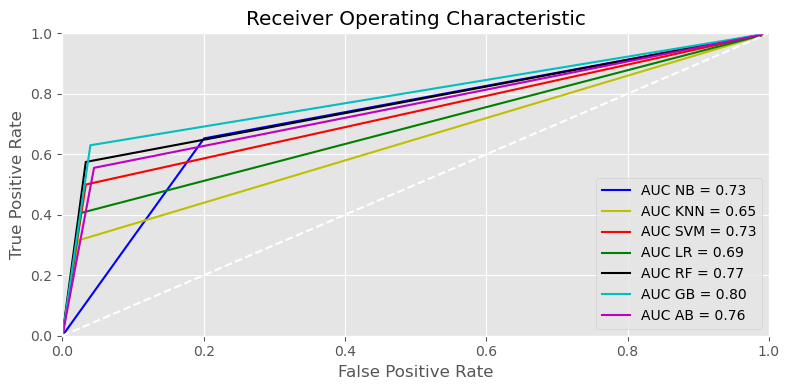

In [59]:
fpr_nb, tpr_nb, threshold_nb = metrics.roc_curve(y_val, nbm_pred)
roc_auc_nb = metrics.auc(fpr_nb, tpr_nb)
fpr_knn, tpr_knn, threshold_knn = metrics.roc_curve(y_val, knn_grid_pred)
roc_auc_knn = metrics.auc(fpr_knn, tpr_knn)
fpr_svm, tpr_svm, threshold_svm = metrics.roc_curve(y_val, svm_grid_pred)
roc_auc_svm = metrics.auc(fpr_svm, tpr_svm)
fpr_lrm, tpr_lrm, threshold_lrm = metrics.roc_curve(y_val, lrm_grid_pred)
roc_auc_lrm = metrics.auc(fpr_lrm, tpr_lrm)
fpr_rfm, tpr_rfm, threshold_rfm = metrics.roc_curve(y_val, rfm_grid_pred)
roc_auc_rfm = metrics.auc(fpr_rfm, tpr_rfm)
fpr_gbm, tpr_gbm, threshold_gbm = metrics.roc_curve(y_val, gbm_pred)
roc_auc_gbm = metrics.auc(fpr_gbm, tpr_gbm)
fpr_abm, tpr_abm, threshold_abm = metrics.roc_curve(y_val, abm_grid_pred)
roc_auc_abm = metrics.auc(fpr_abm, tpr_abm)

fig = plt.figure(figsize=(8, 4))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr_nb, tpr_nb, 'b', label = 'AUC NB = %0.2f' % roc_auc_nb)
plt.plot(fpr_knn, tpr_knn, 'y', label = 'AUC KNN = %0.2f' % roc_auc_knn)
plt.plot(fpr_svm, tpr_svm, 'r', label = 'AUC SVM = %0.2f' % roc_auc_svm)
plt.plot(fpr_lrm, tpr_lrm, 'g', label = 'AUC LR = %0.2f' % roc_auc_lrm)
plt.plot(fpr_rfm, tpr_rfm, 'k', label = 'AUC RF = %0.2f' % roc_auc_rfm)
plt.plot(fpr_gbm, tpr_gbm, 'c', label = 'AUC GB = %0.2f' % roc_auc_gbm)
plt.plot(fpr_abm, tpr_abm, 'm', label = 'AUC AB = %0.2f' % roc_auc_abm)

plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'w--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.tight_layout()
plt.show()

It is clear from all the calculated classification metrics shown above that **Gradient Boosting** classifier is the one with the highest performance, and thus, it is the one we will continue to choose. 

### Best Model Further Tuning 

Here we will experment manually tuning some of Gradient Boosting's hyper-parameters, to see if we can improve its classification performance further more. 

Not all the tests are going to be shown below, we will only show the ones that improved GB's classification performance, yet here is a list of the tests we have tried, by changing only one parameter value at a time: 

|Parameter Tested|Value Tested|Effect on Classification Performance|
|:---------------|:-----------|:-----------------------------------|
|n-estimators | 10 | way lower
|n-estimators | 50 | slightly lower
|n-estimators | 131 |  **better**
|n-estimators | 500 |  lower
|n-estimators | 2000 |  lower
|Learning_rate | 0.9  | lower
|Learning_rate | 0.02 | lower
|Learning_rate | 0.2 | slightly lower
|Learning_rate | 0.08 | slightly lower
|loss | 'exponential' | slightly lower
|subsample | 0.1 | lower
|subsample | 0.8 | slightly lower
|min_samples_split | 5 | slightly lower
|min_samples_split | 19 | slightly lower
|min_samples_split | 49 | slightly lower
|min_samples_leaf | 5 | lower
|min_samples_leaf | 19 | slightly lower
|min_samples_leaf | 49 | slightly lower
|max_depth | 1 | lower 
|max_depth | 7 | slightly lower 
|max_depth | 27 | slightly lower 
|max_depth | 47 | lower 
|max_features | 3 | slightly lower 
|max_features | 15 | slightly lower 

From those tests, we will change the number of estimators in our GB model from 100 to 131. The new GB model's performance on the validation set is shown below. 

In [60]:
gbm2 = GradientBoostingClassifier(loss='deviance',
    learning_rate=0.1,
    n_estimators=131,
    subsample=1.0,
    criterion='friedman_mse',
    min_samples_split=2,
    min_samples_leaf=1,
    max_depth=3,
    max_features=None) #default parameters
gbm2.fit(X_train,y_train)
gbm2_pred = gbm2.predict(X_val)

print('Gradient Boost Performance test :')
print('---------------------------------')
print('Accuracy        : ', metrics.accuracy_score(y_val, gbm2_pred))
print('F1 Score        : ', metrics.f1_score(y_val, gbm2_pred))
print('Precision       : ', metrics.precision_score(y_val, gbm2_pred))
print('Recall          : ', metrics.recall_score(y_val, gbm2_pred))
print('Confusion Matrix:\n ', confusion_matrix(y_val, gbm2_pred))

Gradient Boost Performance test :
---------------------------------
Accuracy        :  0.9069767441860465
F1 Score        :  0.6950354609929078
Precision       :  0.765625
Recall          :  0.6363636363636364
Confusion Matrix:
  [[1481   60]
 [ 112  196]]


We can plot how our best GB classifier sees the importance of different features in the dataset.

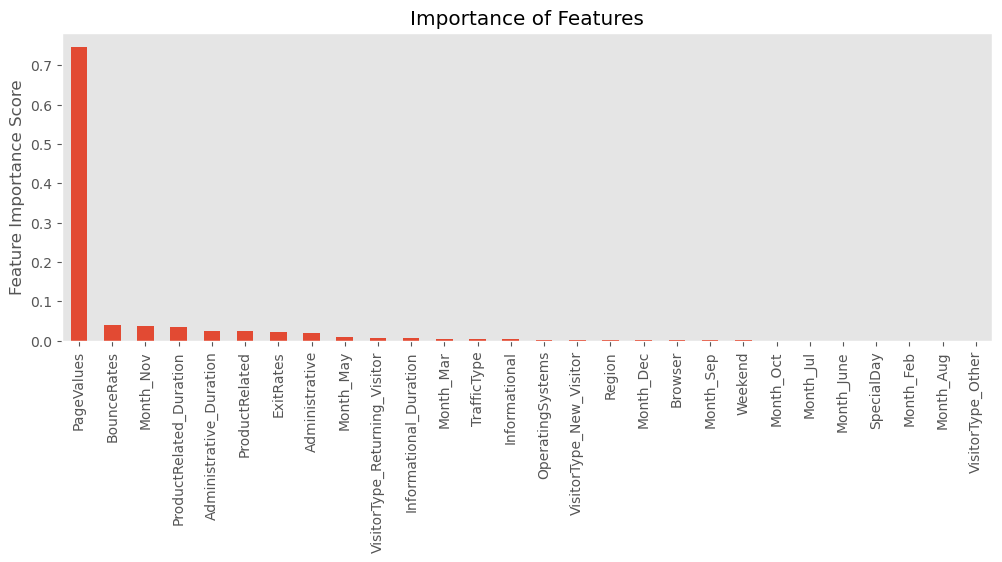

In [61]:
feat_imp = pd.Series(gbm2.feature_importances_, list(X_train)).sort_values(ascending=False)
fig = plt.figure(figsize=(12, 4))
feat_imp.plot(kind='bar', title='Importance of Features')
plt.ylabel('Feature Importance Score')
plt.grid()
plt.show()

As expected, *PageValues* is the most important feature in our dataset, sinc eit is the feature with the highest level of corrolation with our labels (*Revenue*). In general, this feature importance graph agrees with our corrlation analysis of the dataset. 

### Measuring True Performance 

In order to measure the true performance of our classification model, we need to examine its berformance on pur testing dataset, that we have not used so far.

In [62]:
gb = GradientBoostingClassifier(loss='deviance',
    learning_rate=0.1,
    n_estimators=131,
    subsample=1.0,
    criterion='friedman_mse',
    min_samples_split=2,
    min_samples_leaf=1,
    max_depth=3,
    max_features=None) #final parameters
gb.fit(X_train,y_train)
gb_pred = gb.predict(X_test)

print('Gradient Boost: Final  ClassificationPerformance test :')
print('-------------------------------------------------------')
print('Accuracy        : ', metrics.accuracy_score(y_test, gb_pred))
print('F1 Score        : ', metrics.f1_score(y_test, gb_pred))
print('Precision       : ', metrics.precision_score(y_test, gb_pred))
print('Recall          : ', metrics.recall_score(y_test, gb_pred))
print('Confusion Matrix:\n ', confusion_matrix(y_test, gb_pred))
print(classification_report(y_test, gb_pred, target_names=['Rev=0', 'Rev=1']))

Gradient Boost: Final  ClassificationPerformance test :
-------------------------------------------------------
Accuracy        :  0.9086486486486487
F1 Score        :  0.6572008113590264
Precision       :  0.7012987012987013
Recall          :  0.6183206106870229
Confusion Matrix:
  [[1519   69]
 [ 100  162]]
              precision    recall  f1-score   support

       Rev=0       0.94      0.96      0.95      1588
       Rev=1       0.70      0.62      0.66       262

    accuracy                           0.91      1850
   macro avg       0.82      0.79      0.80      1850
weighted avg       0.90      0.91      0.91      1850



### Conclusion

In this project, we used *Online Shoppers Intention* dataset to build models that can classify website visitor, and predict which of them is likely going to make a purchase on the website. 7 different learning classifiers (Naive Bayes, KNN, SVM, Logistic Regression, Random Forest, Gradiant Boosting, and Adaboosting) were tested and optimized, and we have achieved the best classification performance using Gradient Boost classifier, followed by random Forest, and then Adaboost.

The best classification performance:

Accuracy: 91%

F1 Score: 0.66

Note: There is a clear difference of classification performance between the 2 classes, that is meanly due to the unbalanced nature of our dataset, where around 85% of our data points belong to 1 class, and less than 15% belong to the other. 

For **future work**, different techniques can be considered for mitigating the effects of unbalanced classes. 